1.爬取网站（携程https://you.ctrip.com/sight/shenzhen26.html）

In [ ]:
import requests
import time
import random
from lxml import etree



with open('shenzhen1-150.csv', 'w', encoding='utf-8-sig') as f:#爬1-150页,gbk只能爬前80页，修改encoding为utf再爬
    f.write('景点名称,url,星级,城市,地址,票价,销量,热度,评分\n')

for data in range(1,151):  # 翻页
    print(data)
    r = random.randint(1,3)
    time.sleep(r)
    url = f'https://you.ctrip.com/sight/shenzhen26/s0-p{data}.html'  # 这里用f-string，s0-p分页

    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36',

    }
    response = requests.get(url=url, headers=headers).text
    trees = etree.HTML(response)
    tree = trees.xpath('//div[@class="cardListBox_box__lMuWz"]/div[@class="sightItemCard_box__2FUEj "]')
    for tre in tree:
        content_list = []
        content = {}
        content['url'] = tre.xpath('.//a/@href')[0]
        content['title'] = tre.xpath('.//a/text()')[0].replace(","," ").replace("•"," ")

        try:
            xingji = tre.xpath('.//span[@class="titleModule_level-text-view__40Dbg titleModule_level-text__lxAaP"]/text()')[0]
        except IndexError:
            xingji = '0'
        content['xingji'] = xingji

        citys = tre.xpath('.//span[@class="distanceView_desc-text__jb8H9"]/text()')[0].replace(" ","")
        content['city'] = '深圳'
        content['adress'] = tre.xpath('.//span[@class="distanceView_desc-text__jb8H9"]/text()')[0]

        try:
            pricess = tre.xpath('.//div[@class="priceView_real-price-view__l7J6R"]/span/text()')
            prices = ''.join(pricess).strip().replace("门票", "").replace("¥", "").replace("起", "").replace("门市价", "")
            if '免费' in prices:
                price = '0'
            elif not prices:  # 添加空值判断
                price = '0'
            else:
                price = prices
        except IndexError:
            price = '0'
        content['price'] = price

        try:
            countss = tre.xpath('.//span[@class="commentInfoModule_comment-text__UBk1F"]/text()')[0]
            if '万' in countss:
                countsss = countss.replace("万条点评", "")
                counts = str(int(float(countsss) * 10000))
            else:
                countssss = countss.replace("条点评", "")
                counts = countssss
        except IndexError:
            counts = '0'
        content['counts'] = counts

        try:
            redu = tre.xpath('.//span[@class="commentInfoModule_heat-score_value__J8p3b"]/text()')[0]
        except IndexError:
            redu = '0'
        content['redu'] = redu

        try:
            cores = tre.xpath('.//span[@class="commentInfoModule_comment-text__UBk1F commentInfoModule_comment-score_value__iUsa8"]/text()')[0]
        except IndexError:
            cores = '无'
        content['cores'] = cores



        content_list.append(content)
        print(content_list)

        with open('shenzhen1-150.csv', 'a', encoding='utf-8-sig') as f:
            for content in content_list:
                f.write(
                    content['title'] + ',' + content['url'] + ',' + content['xingji'] + ',' + content['city'] + ',' +
                    content['adress'] + ',' + content['price'] + ',' + content['counts'] + ',' + content['redu'] + ',' + content['cores'] + '\n')

1
[{'url': 'https://you.ctrip.com/sight/shenzhen26/2778.html?scene=online', 'title': '深圳世界之窗', 'xingji': '0', 'city': '深圳', 'adress': '华侨城', 'price': '69', 'counts': '42000', 'redu': '8.2', 'cores': '4.5'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/4336342.html?scene=online', 'title': '深圳平安金融中心云际观光层', 'xingji': '0', 'city': '深圳', 'adress': '会展中心/CBD', 'price': '180', 'counts': '21000', 'redu': '7.5', 'cores': '4.9'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/2776.html?scene=online', 'title': '锦绣中华民俗村', 'xingji': '0', 'city': '深圳', 'adress': '华侨城', 'price': '59.9', 'counts': '21000', 'redu': '7.1', 'cores': '4.7'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/13720.html?scene=online', 'title': '深圳欢乐谷', 'xingji': '0', 'city': '深圳', 'adress': '华侨城', 'price': '146', 'counts': '33000', 'redu': '7.0', 'cores': '4.8'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/6037.html?scene=online', 'title': '深圳野生动物园', 'xingji': '4A', 'city': '深圳', 'adress': '大学城/西丽动物园', 'price': '9

In [12]:
import requests
import time
import random
from lxml import etree



with open('shenzhen151-300.csv', 'w', encoding='utf-8-sig') as f:#爬151-300页,修改encoding再爬
    f.write('景点名称,url,星级,城市,地址,票价,销量,热度,评分\n')

for data in range(151,301):  # 翻页
    print(data)
    r = random.randint(1,3)
    time.sleep(r)
    url = f'https://you.ctrip.com/sight/shenzhen26/s0-p{data}.html'  # 这里用f-string

    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36',

    }
    response = requests.get(url=url, headers=headers).text
    trees = etree.HTML(response)
    tree = trees.xpath('//div[@class="cardListBox_box__lMuWz"]/div[@class="sightItemCard_box__2FUEj "]')
    for tre in tree:
        content_list = []
        content = {}
        content['url'] = tre.xpath('.//a/@href')[0]
        content['title'] = tre.xpath('.//a/text()')[0].replace(","," ").replace("•"," ")

        try:
            xingji = tre.xpath('.//span[@class="titleModule_level-text-view__40Dbg titleModule_level-text__lxAaP"]/text()')[0]
        except IndexError:
            xingji = '0'
        content['xingji'] = xingji

        citys = tre.xpath('.//span[@class="distanceView_desc-text__jb8H9"]/text()')[0].replace(" ","")
        content['city'] = '深圳'
        content['adress'] = tre.xpath('.//span[@class="distanceView_desc-text__jb8H9"]/text()')[0]

        try:
            pricess = tre.xpath('.//div[@class="priceView_real-price-view__l7J6R"]/span/text()')
            prices = ''.join(pricess).strip().replace("门票", "").replace("¥", "").replace("起", "").replace("门市价", "")
            if '免费' in prices:
                price = '0'
            elif not prices:  # 添加空值判断
                price = '0'
            else:
                price = prices
        except IndexError:
            price = '0'
        content['price'] = price

        try:
            countss = tre.xpath('.//span[@class="commentInfoModule_comment-text__UBk1F"]/text()')[0]
            if '万' in countss:
                countsss = countss.replace("万条点评", "")
                counts = str(int(float(countsss) * 10000))
            else:
                countssss = countss.replace("条点评", "")
                counts = countssss
        except IndexError:
            counts = '0'
        content['counts'] = counts

        try:
            redu = tre.xpath('.//span[@class="commentInfoModule_heat-score_value__J8p3b"]/text()')[0]
        except IndexError:
            redu = '0'
        content['redu'] = redu

        try:
            cores = tre.xpath('.//span[@class="commentInfoModule_comment-text__UBk1F commentInfoModule_comment-score_value__iUsa8"]/text()')[0]
        except IndexError:
            cores = '无'
        content['cores'] = cores



        content_list.append(content)
        print(content_list)

        with open('shenzhen151-300.csv', 'a', encoding='utf-8-sig') as f:
            for content in content_list:
                f.write(
                    content['title'] + ',' + content['url'] + ',' + content['xingji'] + ',' + content['city'] + ',' +
                    content['adress'] + ',' + content['price'] + ',' + content['counts'] + ',' + content['redu'] + ',' + content['cores'] + '\n')

151
[{'url': 'https://you.ctrip.com/sight/guangzhou152/152975903.html?scene=online', 'title': '广州 · 法语原版音乐剧《罗密欧与朱丽叶》', 'xingji': '0', 'city': '深圳', 'adress': '距深圳98.5km', 'price': '0', 'counts': '0', 'redu': '0', 'cores': '无'}]
[{'url': 'https://you.ctrip.com/sight/zhuhai27/98275524.html?scene=online', 'title': '海洋夜光大巡游', 'xingji': '0', 'city': '深圳', 'adress': '距深圳72.9km', 'price': '0', 'counts': '7', 'redu': '3.0', 'cores': '5'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/149340383.html?scene=online', 'title': '深圳新鹏城足球俱乐部', 'xingji': '0', 'city': '深圳', 'adress': '科技园', 'price': '0', 'counts': '0', 'redu': '1.5', 'cores': '无'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/144228329.html?scene=online', 'title': '深圳市宝安体育中心体育场', 'xingji': '0', 'city': '深圳', 'adress': '宝安商业区', 'price': '0', 'counts': '0', 'redu': '1.5', 'cores': '无'}]
[{'url': 'https://you.ctrip.com/sight/shenzhen26/130842880.html?scene=online', 'title': '深圳文化创意园', 'xingji': '0', 'city': '深圳', 'adress': '皇岗口岸/福田口

In [9]:
pip install pyecharts  #为后续可视化做准备

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#为后续可视化做准备': Expected package name at the start of dependency specifier
    #为后续可视化做准备
    ^


2.dataclean

2.1 合并两个csv文件，并保存为shenzhenall

In [3]:
import pandas as pd

# 合并并保存
df1 = pd.read_csv('shenzhen1-150.csv', encoding='utf-8-sig')
df2 = pd.read_csv('shenzhen151-300.csv', encoding='utf-8-sig')

# 合并
df_all = pd.concat([df1, df2], ignore_index=True)

# 保存
df_all.to_csv('shenzhenall.csv', index=False, encoding='utf-8-sig')

print(f"合并完成！总共 {len(df_all)} 条数据已保存到 shenzhenall.csv")

合并完成！总共 2982 条数据已保存到 shenzhenall.csv


2.2 正式dataclean

In [4]:
# 读取深圳数据
data = pd.read_csv('shenzhenall.csv', encoding='utf-8-sig')
# 注意：深圳数据是utf-8编码

# 查看数据
print("数据形状:", data.shape)  # 显示多少行多少列
print("前5行数据:")
print(data.head())

print("列名:")
print(data.columns.tolist())  # 显示所有列名

数据形状: (2982, 9)
前5行数据:
            景点名称                                                url  星级  城市  \
0         深圳世界之窗  https://you.ctrip.com/sight/shenzhen26/2778.ht...   0  深圳   
1  深圳平安金融中心云际观光层  https://you.ctrip.com/sight/shenzhen26/4336342...   0  深圳   
2        锦绣中华民俗村  https://you.ctrip.com/sight/shenzhen26/2776.ht...   0  深圳   
3          深圳欢乐谷  https://you.ctrip.com/sight/shenzhen26/13720.h...   0  深圳   
4        深圳野生动物园  https://you.ctrip.com/sight/shenzhen26/6037.ht...  4A  深圳   

          地址     票价     销量   热度   评分  
0        华侨城   69.0  42000  8.2  4.5  
1   会展中心/CBD  180.0  21000  7.5  4.9  
2        华侨城   59.9  21000  7.1  4.7  
3        华侨城  146.0  33000  7.0  4.8  
4  大学城/西丽动物园   99.0  13000  6.9  4.4  
列名:
['景点名称', 'url', '星级', '城市', '地址', '票价', '销量', '热度', '评分']


2.2.1解决中文字体显示问题

操作系统: Windows


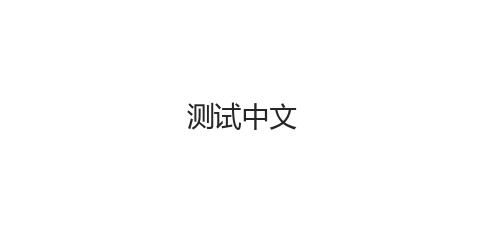

✅ 成功使用字体: Microsoft YaHei


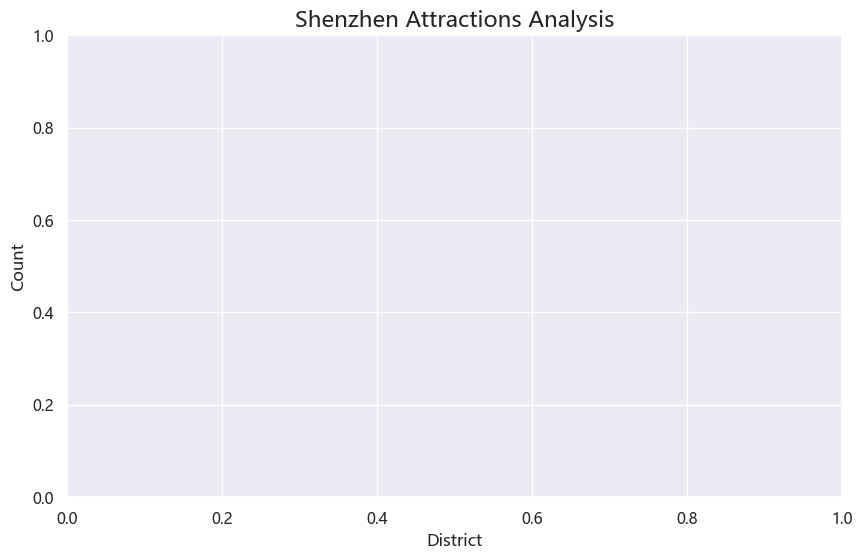

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import os

# ========== 终极解决方案 ==========
def ultimate_chinese_font_solution():
    """终极中文字体解决方案"""
    
    system = platform.system()
    print(f"操作系统: {system}")
    
    # 按系统设置字体
    if system == "Windows":
        # Windows字体
        font_candidates = [
            'Microsoft YaHei',  # 微软雅黑（Win8+自带）
            'SimHei',           # 黑体
            'KaiTi',            # 楷体
            'FangSong',         # 仿宋
            'Arial'
        ]
    elif system == "Darwin":  # Mac
        # Mac字体
        font_candidates = [
            'Arial Unicode MS',     # 苹果自带
            'PingFang SC',         # 苹方
            'Hiragino Sans GB',    # 冬青黑体
            'STHeiti',             # 华文黑体
            'Arial'
        ]
    else:  # Linux
        font_candidates = [
            'WenQuanYi Zen Hei',   # 文泉驿正黑
            'DejaVu Sans',
            'Arial'
        ]
    
    # 尝试设置
    for font in font_candidates:
        try:
            plt.rcParams['font.sans-serif'] = [font, 'DejaVu Sans', 'Arial']
            plt.rcParams['axes.unicode_minus'] = False
            sns.set(font=font)
            
            # 测试
            plt.figure(figsize=(6, 3))
            plt.text(0.5, 0.5, '测试中文', fontsize=20, ha='center')
            plt.axis('off')
            plt.show()
            
            print(f"✅ 成功使用字体: {font}")
            return True
        except:
            continue
    
    print("❌ 所有字体都失败，使用英文")
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    return False

# 执行
ultimate_chinese_font_solution()

# 现在可以正常画图了
data = pd.read_csv('shenzhenall.csv', encoding='utf-8-sig')

plt.figure(figsize=(10, 6))
# 用英文或测试中文
plt.title('Shenzhen Attractions Analysis', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 如果上面测试成功，这里可以尝试中文
# plt.title('深圳景点分析', fontsize=16)

plt.show()

2.2.2清洗数据，保存为shenzhenclean.csv

原始数据: 2982 条
筛选后数据: 1811 条
去除了 1171 条非深圳URL数据
清理前数据: 1811 条

发现 233 条演唱会/演出数据:
                               景点名称  \
5       深圳 · 陈楚生“荒芜之境”2025巡回演唱会—深圳站   
12  深圳 · 周柏豪「CHAPTER IV」粉丝见面会巡演-深圳站   
14          深圳 · 2026张韶涵「觅光」世界巡回演唱会   
17      深圳 · 周传雄2026《念念不忘·再遇见》巡回演唱会   
19         深圳 · 潘玮柏“狂爱2.0”巡回演唱会-深圳站   

                                                  url  
5   https://you.ctrip.com/sight/shenzhen26/1534397...  
12  https://you.ctrip.com/sight/shenzhen26/1534241...  
14  https://you.ctrip.com/sight/shenzhen26/1531982...  
17  https://you.ctrip.com/sight/shenzhen26/1532467...  
19  https://you.ctrip.com/sight/shenzhen26/1531982...  
清理后数据: 1578 条
移除了 233 条演唱会/演出数据
缺失值统计:
景点名称    0
url     0
星级      0
城市      0
地址      0
票价      0
销量      0
热度      0
评分      0
dtype: int64
是否存在重复值: False
去重后数据: 1578 条


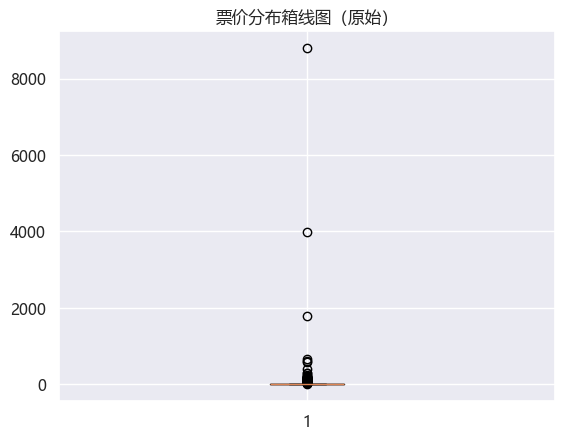

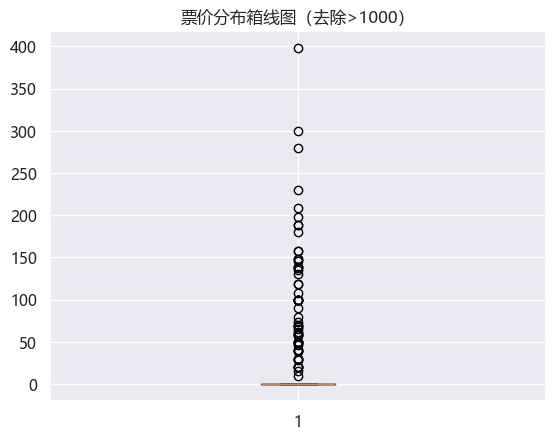

前5条数据:
            景点名称                                                url  星级  城市  \
0         深圳世界之窗  https://you.ctrip.com/sight/shenzhen26/2778.ht...   0  深圳   
1  深圳平安金融中心云际观光层  https://you.ctrip.com/sight/shenzhen26/4336342...   0  深圳   
2        锦绣中华民俗村  https://you.ctrip.com/sight/shenzhen26/2776.ht...   0  深圳   
3          深圳欢乐谷  https://you.ctrip.com/sight/shenzhen26/13720.h...   0  深圳   
4        深圳野生动物园  https://you.ctrip.com/sight/shenzhen26/6037.ht...  4A  深圳   

          地址     票价     销量   热度   评分       总销售额  
0        华侨城   69.0  42000  8.2  4.5  2898000.0  
1   会展中心/CBD  180.0  21000  7.5  4.9  3780000.0  
2        华侨城   59.9  21000  7.1  4.7  1257900.0  
3        华侨城  146.0  33000  7.0  4.8  4818000.0  
4  大学城/西丽动物园   99.0  13000  6.9  4.4  1287000.0  

数据清洗完成！已保存到: shenzhenclean.csv
最终数据量: 1572 条


In [7]:
# 读取深圳数据
data = pd.read_csv('shenzhenall.csv', encoding='utf-8-sig')
# 注意：深圳数据是utf-8编码

# 让图表在VS Code中显示
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# 保存原始数据条数
original_count = len(data)
print(f"原始数据: {original_count} 条")

# 只保留URL中包含"shenzhen"的数据
data = data[data['url'].str.contains('shenzhen', case=False, na=False)]

print(f"筛选后数据: {len(data)} 条")
print(f"去除了 {original_count - len(data)} 条非深圳URL数据")

# 清理非景点数据（演唱会、音乐节等）
def remove_concerts(data):
    """移除演唱会等临时活动"""
    
    # 定义需要排除的关键词（演唱会相关）
    concert_keywords = [
        '演唱会', '音乐会', '音乐节', 'Live', 'CONCERT',
        '巡回', '巡演', '演出', '音乐现场', '歌友会',
        '音乐剧', '话剧', '舞台剧', '戏剧', '表演','展'
    ]
    
    print(f"清理前数据: {len(data)} 条")
    
    # 标记需要删除的行
    mask = data['景点名称'].apply(
        lambda x: any(keyword in str(x) for keyword in concert_keywords)
    )
    
    # 查看要删除的数据
    concerts_to_remove = data[mask]
    if len(concerts_to_remove) > 0:
        print(f"\n发现 {len(concerts_to_remove)} 条演唱会/演出数据:")
        print(concerts_to_remove[['景点名称', 'url']].head())
    
    # 清理数据
    data_clean = data[~mask].copy()
    
    print(f"清理后数据: {len(data_clean)} 条")
    print(f"移除了 {len(data) - len(data_clean)} 条演唱会/演出数据")
    
    return data_clean

# 使用
data = remove_concerts(data)

# 查看缺失值
missing_values = data.isnull().sum()
print("缺失值统计:")
print(missing_values)

# 查看数据是否有重复值
has_duplicates = any(data.duplicated())
print(f"是否存在重复值: {has_duplicates}")

# 删除重复值
data.drop_duplicates(inplace=True)
print(f"去重后数据: {len(data)} 条")

# 查看票价是否存在异常值
plt.boxplot(data['票价'])
plt.title('票价分布箱线图（原始）')
plt.show()

# 对票价中的异常值进行处理，筛选出票价大于500的异常数据
data = data[data['票价']<500]
plt.boxplot(data['票价'])
plt.title('票价分布箱线图（去除>1000）')
plt.show()

# 根据各景区的票价和销量得出新的总销售额一列数据
data['总销售额'] = data['票价'] * data['销量']
print("前5条数据:")
print(data.head())

# 保存清洗后的数据到shenzhenclean.csv
data.to_csv('shenzhenclean.csv', index=False, encoding='utf-8-sig')
print(f"\n数据清洗完成！已保存到: shenzhenclean.csv")
print(f"最终数据量: {len(data)} 条")

3.data visulization

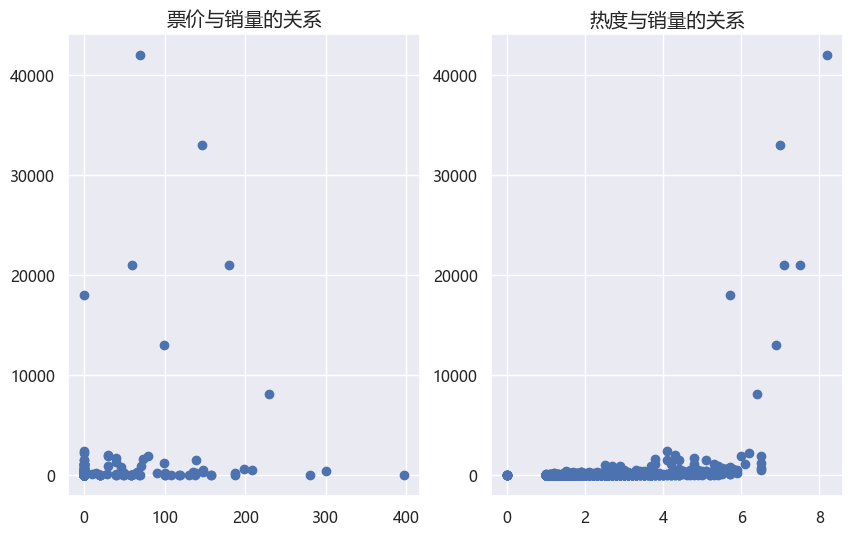

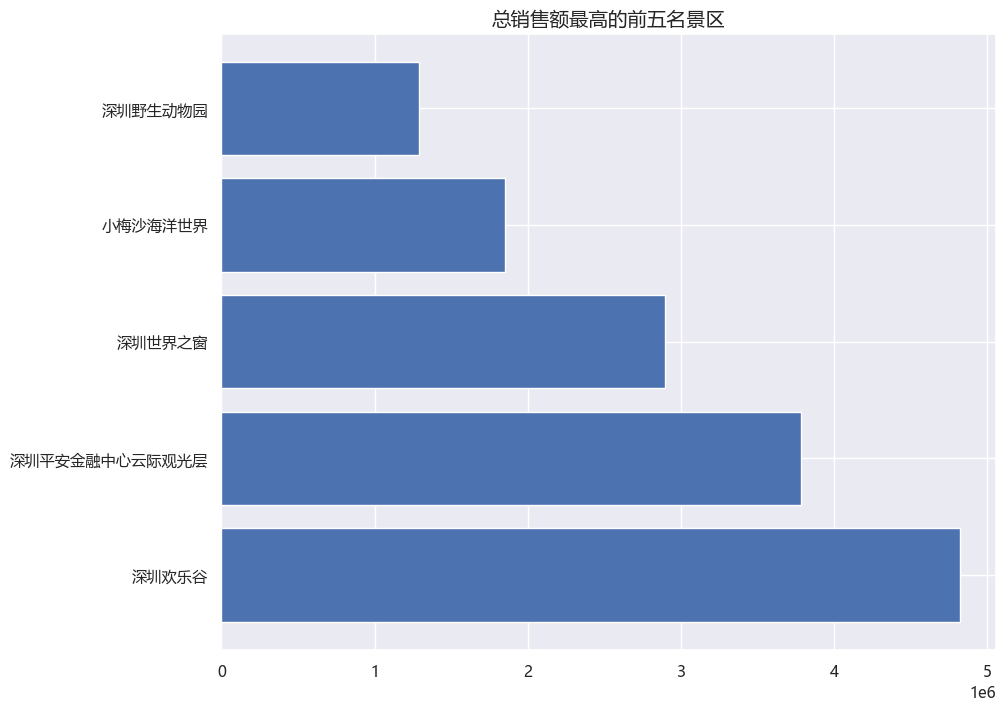

准备漏斗图数据...
使用星级数据: 3 个星级
df2 数据:
星级
0     1563
4A       7
5A       2
Name: count, dtype: int64

✅ 已生成: 深圳漏斗图.html


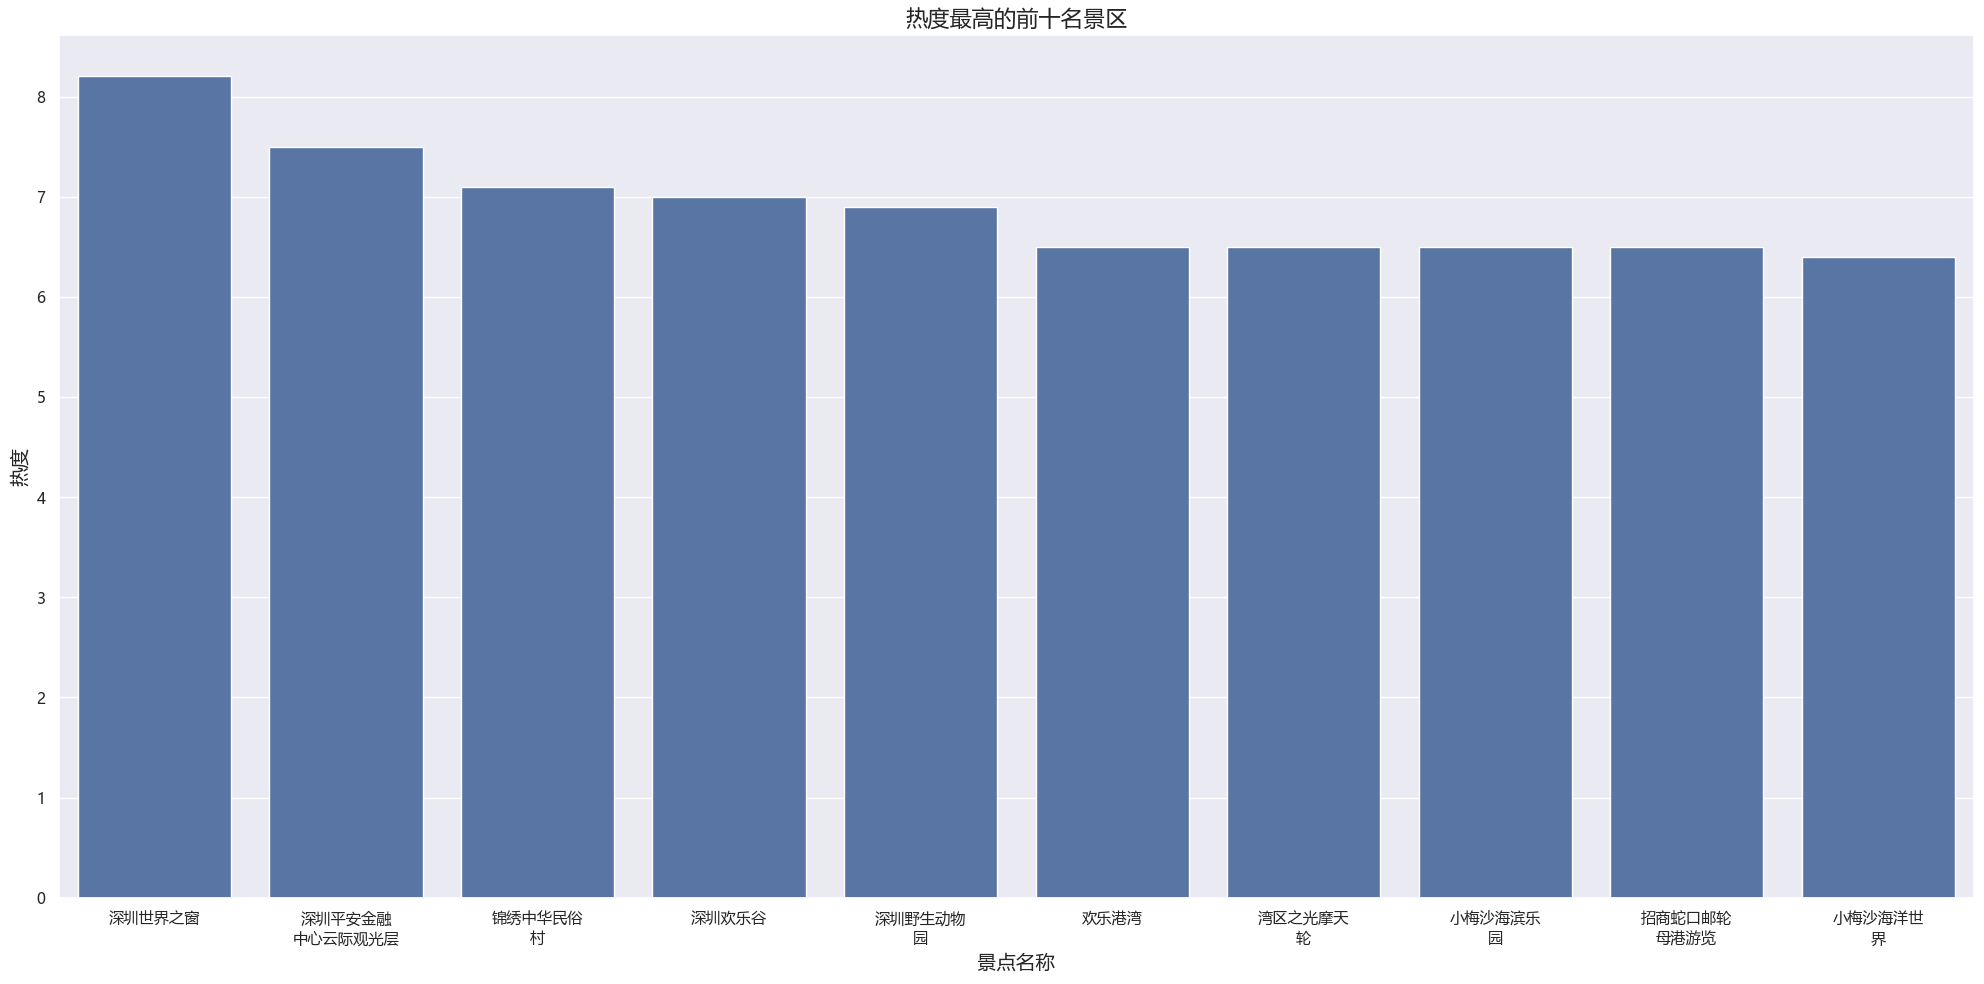

In [13]:
import pandas as pd
from pyecharts.charts import Pie, Bar, Map, Funnel
from pyecharts import options as opts
from pyecharts.globals import ThemeType
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 让图表在VS Code中显示
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# 读取深圳数据
data = pd.read_csv('shenzhenclean.csv', encoding='utf-8-sig')
# 注意：深圳数据是utf-8编码

# 一、深圳各星级景点数占比
# 创建一个环形图
m1 = data['星级'].value_counts().index.tolist()  # 人物的类别
n1 = data['星级'].value_counts().values.tolist()  # 对应类别的数量
pie = Pie(init_opts=opts.InitOpts(width='800px', height='500px', bg_color='white'))
pie.add(
    series_name=' ',  # 系列名称
    data_pair=list(zip(m1, n1)),  # 数据对
    radius=['40%', '70%'],  # 设置内圆和外圆的半径，创建环形图
    label_opts=opts.LabelOpts(
        is_show=True,
        position='outside',  # 尝试将标签放在外部（但可能不会按预期工作）
        formatter="{a} {b}: {c} ({d}%)"  # 自定义标签格式，但{d}%需要额外计算
    ),

)

total = sum(n1)
formatted_data = [(category, f"{value} ({round(value / total * 100, 2)}%)") for category, value in zip(m1, n1)]
pie.set_series_opts(
    tooltip_opts=opts.TooltipOpts(
        trigger="item",
        formatter="{a} {b}: {c} ({d}%)"  # {d}是索引，但我们可以通过formatter函数来替换它
    ),
)

# 设置全局选项
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='深圳星级景点数占比', title_textstyle_opts=opts.TextStyleOpts(font_size=20)),
    legend_opts=opts.LegendOpts(is_show=True)
)

# 渲染图表到HTML文件
pie.render('深圳各星级景点数占比.html')


# 二、分析票价、热度和销量之间的关系
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x=data['票价'],y=data['销量'])
plt.title('票价与销量的关系',fontsize=14)
plt.subplot(1,2,2)
plt.scatter(x=data['热度'],y=data['销量'])
plt.title('热度与销量的关系',fontsize=14)
plt.show()


# 三、景区名称词云图
from pyecharts.charts import WordCloud
import collections
result_list = []
for i in data['景点名称'].values:
    word_list = str(i).split('/')
    for j in word_list:
        result_list.append(j)
result_list
word_counts = collections.Counter(result_list)
word_counts_top = word_counts.most_common(100)
wc = WordCloud()
wc.add('',word_counts_top)
wc.render(path='词云图.html')
wc.render_notebook()


# 四、总销售额最高的前五名景区
df3 = data.sort_values('总销售额',ascending=False)[['景点名称','总销售额']].head()
plt.figure(figsize=(10,8))
plt.barh(y=df3['景点名称'].values,width=df3['总销售额'])
plt.title('总销售额最高的前五名景区',fontsize=14)
plt.show()

# 五、漏斗图
# 1. 创建 df2
print("准备漏斗图数据...")

# 用区域数据，如果没有就用星级
if '区域' in data.columns:
    df2 = data['区域'].value_counts()
    print(f"使用区域数据: {len(df2)} 个区域")
else:
    df2 = data['星级'].value_counts()
    print(f"使用星级数据: {len(df2)} 个星级")

print("df2 数据:")
print(df2.head())

# 2. 漏斗图
funnel = Funnel()
funnel.add('', [(i,j) for i,j in zip(df2.head(25).index.to_list(), df2.head(25).values.tolist())],
          label_opts=opts.LabelOpts(position='inside'))

# 修改标题为深圳相关
funnel.set_global_opts(
    title_opts=opts.TitleOpts(title='深圳景点分布漏斗图', pos_top=50)
)

# 3. 保存
funnel.render(path='深圳漏斗图.html')
print("\n✅ 已生成: 深圳漏斗图.html")

# 显示
try:
    funnel.render_notebook()
except:
    pass

# 七、热度最高的前十名景区
# 自动换行长名称
def wrap_text(text, max_len=8):
    """如果名称太长就换行"""
    if len(text) > max_len:
        # 在合适位置插入换行符
        return text[:max_len] + '\n' + text[max_len:]
    return text

df3 = data.sort_values(by='热度', ascending=False)[['景点名称', '热度']].head(10).copy()

# 处理景点名称，长名称换行
df3['景点名称_显示'] = df3['景点名称'].apply(lambda x: wrap_text(str(x), max_len=6))

plt.figure(figsize=(20, 10))
sns.barplot(x='景点名称_显示', y='热度', data=df3)
plt.xticks(rotation=0, fontsize=11)  # 不需要旋转了
plt.xlabel('景点名称', fontsize=14)
plt.ylabel('热度', fontsize=14)
plt.title('热度最高的前十名景区', fontsize=16)
plt.tight_layout()
plt.show()


# data.groupby('城市').mean().sort_values(by='销量',ascending=False)[['票价','销量']].head(20).plot(kind='bar',figsize=(15,8),title='各个地区的平均票价和平均销量',fontsize=14)
# # data.groupby('城市').mean()[['票价','销量']].head(20).plot(kind='bar',figsize=(15,8),title='各个地区的平均票价和平均销量',fontsize=14)
# plt.show()

热力图

深圳各区景点数量:
区域
其他      593
南山区     372
福田区     188
龙岗区     104
宝安区     100
龙华区      64
大鹏新区     53
罗湖区      31
光明区      25
盐田区      21
坪山区      21
Name: count, dtype: int64

识别率: 37.7% 无法识别

✅ 已生成: 深圳各区景点热力图.html


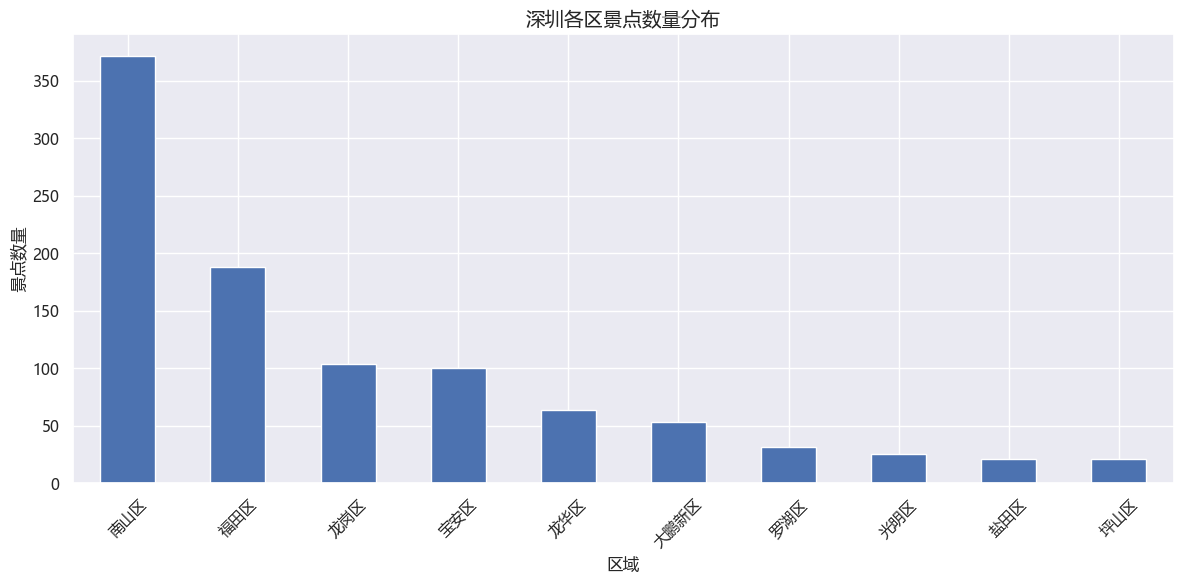

In [14]:
# 完整深圳热力图代码
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 1. 读取数据
data = pd.read_csv('shenzhenclean.csv', encoding='utf-8-sig')

# 2. 提取区域（用方法1）
def extract_district(address):
    if pd.isna(address):
        return "其他"
    
    addr = str(address)
    districts = {
        '华侨城': '南山区', '科技园': '南山区', '大学城': '南山区',
        '华强北': '福田区', '会展中心': '福田区', '皇岗': '福田区',
        '东门': '罗湖区', '万象城': '罗湖区',
        '宝安': '宝安区', '宝安商业区': '宝安区',
        '龙岗': '龙岗区', '布吉': '龙岗区',
        '盐田': '盐田区', '大小梅沙': '盐田区',
        '龙华': '龙华区', '观澜': '龙华区',
        '光明': '光明区',
        '坪山': '坪山区',
        '大鹏': '大鹏新区'
    }
    
    for keyword, district in districts.items():
        if keyword in addr:
            return district
    
    return "其他"

# 3. 应用提取
data['区域'] = data['地址'].apply(extract_district)

# 4. 统计各区景点数量
district_counts = data['区域'].value_counts()

print("深圳各区景点数量:")
print(district_counts)
print(f"\n识别率: {district_counts.get('其他', 0)/len(data)*100:.1f}% 无法识别")

# 5. 准备热力图数据（排除"其他"）
map_data = [[district, int(count)] 
            for district, count in district_counts.items() 
            if district != "其他"]

# 6. 创建热力图
if map_data:
    map_chart = Map()
    map_chart.add("景点数量", map_data, "深圳", is_map_symbol_show=False)
    
    map_chart.set_global_opts(
        title_opts=opts.TitleOpts(title="深圳各区景点数量分布热力图"),
        visualmap_opts=opts.VisualMapOpts(
            max_=max(count for _, count in map_data),
            is_piecewise=True  # 分段显示
        )
    )
    
    map_chart.render("深圳各区景点热力图.html")
    print("\n✅ 已生成: 深圳各区景点热力图.html")
    
    # 同时生成柱状图
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    district_counts[district_counts.index != "其他"].plot(kind='bar')
    plt.title('深圳各区景点数量分布', fontsize=14)
    plt.xlabel('区域', fontsize=12)
    plt.ylabel('景点数量', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("❌ 无法生成热力图：没有识别到区域数据")